In [6]:
import warnings 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report 
from termcolor import colored 
warnings.filterwarnings('ignore') 
print(colored("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...", "green", attrs=['reverse']))

THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...


In [8]:
file_path ='Loan_Data.csv'
try:
    loan_data = pd.read_csv(file_path)
    
    print(colored("THE DATASET LOADED SUCCESSFULLY...", "green", attrs=['reverse']))

except FileNotFoundError:
    print(colored("ERROR: File not found!", "red", attrs=['reverse']))

except Exception as e:
    print(colored(f"ERROR: {e}", "red", attrs=['reverse']))

THE DATASET LOADED SUCCESSFULLY...


In [10]:
loan_data_rows = loan_data.head(2)
print(colored('As you can see, the first 2 rows in the dataset:\n', 'green', attrs=['reverse']))
for index, row in loan_data_rows.iterrows(): 
    print(colored(f"Row {index + 1}:", "white", attrs=['reverse']))
    print(row)
    print("--------------------------------------")

As you can see, the first 2 rows in the dataset:

Row 1:
Loan_ID              LP001002
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object
--------------------------------------
Row 2:
Loan_ID              LP001003
Gender                   Male
Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 N
Name: 1, dtype: object
--------------------------------------


In [12]:
print("The shape =", loan_data.shape)
num_rows, num_cols = loan_data.shape
num_features = num_cols - 1
num_data = num_rows * num_cols
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")
print(colored("The task has been completed without any errors....", "blue", attrs=['reverse']))

The shape = (614, 13)
Number of Rows: 614
Number of Columns: 13
Number of Features: 12
Number of All Data: 7982
The task has been completed without any errors....


In [10]:
print(loan_data.info())
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
The task has been completed without any errors....


In [12]:
loan_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [14]:
loan_data.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


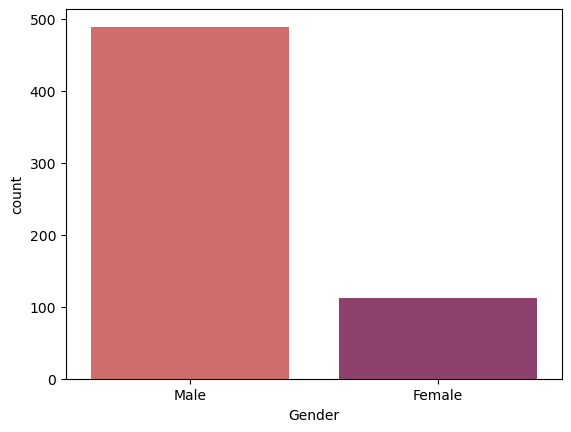

In [16]:
GenderAnalysis = loan_data.Gender.value_counts(dropna=False)
print(GenderAnalysis)
sns.countplot(x="Gender", data=loan_data, palette="flare")
plt.show()

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


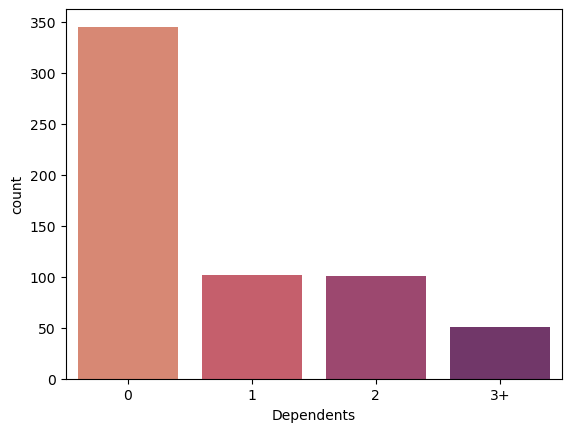

In [18]:
DependentsAnalysis = loan_data.Dependents.value_counts(dropna=False)
print(DependentsAnalysis)
sns.countplot(x="Dependents", data=loan_data, palette="flare")
plt.show()

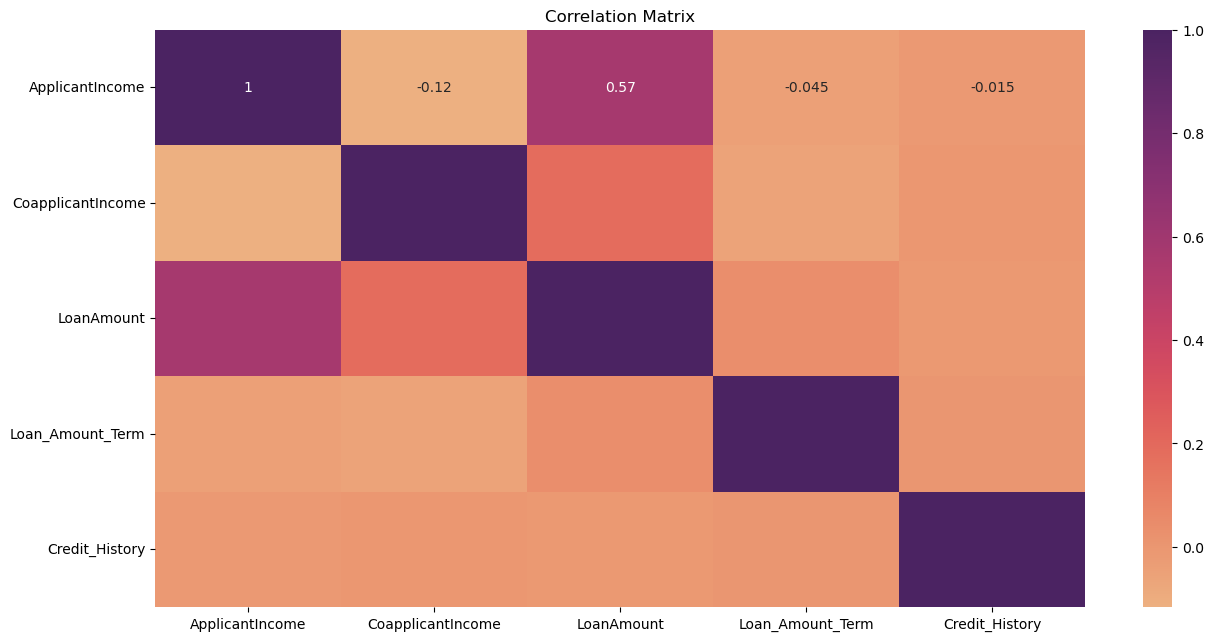

In [20]:
correlation_matrix = loan_data.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell

# Add a title to t
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()